<a href="https://colab.research.google.com/github/sabinedaher20-spec/DataScience-GenAI-Submissions-/blob/main/EDA_DP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task given is to do an EDA on the dataset "EDA-DP.xlsx"

To begin with the EDA, I will ask Gemini to "Upload, read my clean data set, and show the first 5 rows"

In [1]:
import pandas as pd

# Assuming 'EDA-DP.xlsx' is uploaded to the Colab environment
try:
    df = pd.read_excel('EDA-DP.xlsx')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: 'EDA-DP.xlsx' not found. Please upload the file.")
    df = None
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    df = None

if df is not None:
    print("First 5 rows of the dataset:")
    display(df.head())

Dataset loaded successfully.
First 5 rows of the dataset:


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M


Gemini assumed I had already uploaded the "EDA-DP.xlsx" to the Colab environment; next time, I'll make sure to mention it beforehand. Regardless, the code displayed the first five rows of the dataset, just like I wanted. There are 11 columns: "work_year", "experience_level", "employment_type	job_title	salary", "salary_currency", "salary_in_usd", "employee_residence",	"remote_ratio", "company_location", "company_size".




Now that I have reviewed the data dictionary, I understand the variables. To further understand them, i will clasify them by types of data.

*  Categorical: experience_level, employment_type, job_title, salary_currency, employee_residence, company_location, company_size.
*  Numerical: work_year, salary, salary_in_usd, remote_ratio.

In the real world, I would have checked for missing data and removed it from my dataset, but in this case this data has alredy been cleaned, so i will skip this step and move on.


To make EDA trends clearer, correlations possible, and visualisations easier; I will ask Gemini to "Turn "experience_level" and "company_size" into ordinal numbers"

In [6]:
df['experience_level'] = df['experience_level'].replace(experience_level_mapping)
df['company_size'] = df['company_size'].replace(company_size_mapping)

print("Converted 'experience_level' and 'company_size' to ordinal numbers.")
display(df[['experience_level', 'company_size']].head())

Converted 'experience_level' and 'company_size' to ordinal numbers.


,experience_level,company_size
0,2,1
1,2,1
2,2,1
3,2,1
4,2,1


Gemini Converted the "experience_level" and "company_size" columns to ordinal numbers using the pre-defined mappings. I will then ask Gemini to display the first five rows to confirm the change has been made.


In [7]:
print("First 5 rows of the DataFrame with converted columns:")
display(df.head())

print("\nDataFrame Info:")
df.info()

First 5 rows of the DataFrame with converted columns:


,work_year,experience_level,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,employment_type_FL,...,salary_currency_MXN,salary_currency_NOK,salary_currency_NZD,salary_currency_PHP,salary_currency_PLN,salary_currency_SGD,salary_currency_THB,salary_currency_TRY,salary_currency_USD,salary_currency_ZAR
0,2024,2,AI Engineer,202730,202730,US,0,US,1,False,...,False,False,False,False,False,False,False,False,True,False
1,2024,2,AI Engineer,92118,92118,US,0,US,1,False,...,False,False,False,False,False,False,False,False,True,False
2,2024,2,Data Engineer,130500,130500,US,0,US,1,False,...,False,False,False,False,False,False,False,False,True,False
3,2024,2,Data Engineer,96000,96000,US,0,US,1,False,...,False,False,False,False,False,False,False,False,True,False
4,2024,2,Machine Learning Engineer,190000,190000,US,0,US,1,False,...,False,False,False,False,False,False,False,False,True,False



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            16534 non-null  int64 
 1   experience_level     16534 non-null  int64 
 2   job_title            16534 non-null  object
 3   salary               16534 non-null  int64 
 4   salary_in_usd        16534 non-null  int64 
 5   employee_residence   16534 non-null  object
 6   remote_ratio         16534 non-null  int64 
 7   company_location     16534 non-null  object
 8   company_size         16534 non-null  int64 
 9   employment_type_FL   16534 non-null  bool  
 10  employment_type_FT   16534 non-null  bool  
 11  employment_type_PT   16534 non-null  bool  
 12  salary_currency_BRL  16534 non-null  bool  
 13  salary_currency_CAD  16534 non-null  bool  
 14  salary_currency_CHF  16534 non-null  bool  
 15  salary_currency_CLP  16534 non-null 

I have now confirmed that these changes were made:

Experience_level → ordinal numbers (1, 2, 3, 4)
*   EN(1) < MI(2) < SE(3) < EX(4) is an ordered progression.

company_size → ordinal numbers (1, 2, 3)
*   S(1) < M(2) < L(3) is a natural size order.

I will now proceed with my EDA.

I will now summarize Data Statistics by asking Gemini to "calculat summary statistics: mean, median, std dev, min, max, quartiles for numerical variables"

In [8]:
print("Summary Statistics for Numerical Variables:")
display(df.describe())

Summary Statistics for Numerical Variables:


,work_year,experience_level,salary,salary_in_usd,remote_ratio,company_size
count,16534.000000,16534.000000,1.653400e+04,16534.000000,16534.000000,16534.000000
mean,2023.226866,1.625801,1.637270e+05,149686.777973,0.640075,1.051530
std,0.713558,0.674596,3.402057e+05,68505.293156,0.924903,0.267619
min,2020.000000,0.000000,1.400000e+04,15000.000000,0.000000,0.000000
25%,2023.000000,1.000000,1.017630e+05,101125.000000,0.000000,1.000000
50%,2023.000000,2.000000,1.422000e+05,141300.000000,0.000000,1.000000
75%,2024.000000,2.000000,1.872000e+05,185900.000000,2.000000,1.000000
max,2024.000000,3.000000,3.040000e+07,800000.000000,2.000000,2.000000


Salaries are extremely skewed:

*   The maximum salary reaches $30.4M while the median is only $142k. This indicates a strongly right-skewed distribution driven by a small number of extreme outliers. Because of this, the mean salary is not very representative, and I will likely need to log-transform the salary variable or remove extreme cases. I will ask Gemini to draw a histogram later to visually confirm this skew.

The dataset is very recent:

*   Most observations are from 2023–2024 (median = 2023), with the earliest year being 2020. This means the dataset captures current labour-market conditions, making it reliable for modern salary insights.

Experience levels concentrate around mid-senior roles:

*   The median experience level is 2 (mid-level), with values ranging from 0 (entry) to 3 (senior). This shows that the dataset mostly contains mid–senior professionals rather than juniors, which helps explain why overall salary levels appear relatively high. It also means junior-level patterns may be underrepresented.

Remote work distribution is polarised:

*   The 25th and 50th percentiles of remote_ratio are both 0, meaning at least half of the dataset reflects fully on-site roles. The 75th percentile is 2, showing that the top quarter are fully remote. This suggests companies tend to choose either fully on-site or fully remote models rather than hybrid arrangements.


Company size is predominantly medium:

*   The median company size is 1, meaning medium-sized firms make up most of the dataset. Large companies (value = 2) appear but are less common, which may influence salary expectations and organisational structures observed later.

Salary in USD is much more consistent than raw salary:

*   While the raw salary column contains extreme values (up to $30.4M), the USD-converted salary max is $800k. This shows that currency differences and local inflation likely caused distortions in the original salary field. Using the USD column will give more stable and comparable results for analysis.




I will now summarize Data Statistics by asking Gemini to "calculate frequency counts for employmnt_type, job_title, salary_currency, employee_residence, company_location."

In [11]:
print("\n--- Frequency Counts for 'employment_type' categories (from one-hot encoding) ---")
# Get columns related to employment_type after one-hot encoding
employment_type_cols = [col for col in df.columns if col.startswith('employment_type_')]
for col in employment_type_cols:
    print(f"{col.replace('employment_type_', '')}: {df[col].sum()}")

print("\n--- Frequency Counts for 'job_title' ---")
display(df['job_title'].value_counts())

print("\n--- Frequency Counts for 'salary_currency' categories (from one-hot encoding) ---")
# Get columns related to salary_currency after one-hot encoding
salary_currency_cols = [col for col in df.columns if col.startswith('salary_currency_')]
# Find the base currency (USD if it's not dropped first, or the most frequent one)
# For simplicity, let's assume the 'True' values in these columns represent the count of each currency
currency_counts = {}
for col in salary_currency_cols:
    currency_name = col.replace('salary_currency_', '')
    currency_counts[currency_name] = df[col].sum()

# We also need to account for the base category that was dropped if drop_first=True was used
# Assuming 'USD' was the base and its original count can be derived if not directly present.
# Since we dropped the first, if 'USD' is present in the list, its count is directly sum()
# If 'USD' was dropped, its count would be total_rows - sum of all other currencies.
# In the provided info, salary_currency_USD is present, so we can sum it directly.

# To get the count of the 'dropped first' category (e.g., the base for employment_type if not listed directly)
# Assuming the original 'employment_type' had 'FT' as the most frequent and potentially dropped.
# Let's verify the original counts:
# employment_type:
# FT    16454
# PT       38
# CT       28
# FL       14
# If drop_first=True was used and 'CT' was the first column alphabetically (or whatever criteria was used)
# it would be df.shape[0] - sum(other employment_type_XXX columns)

# Based on the info, employment_type_FL, employment_type_FT, employment_type_PT are present, so the dropped one is 'CT'
# Count of CT = total rows - (sum of FL + FT + PT)
total_rows = len(df)
fl_count = df['employment_type_FL'].sum()
ft_count = df['employment_type_FT'].sum()
pt_count = df['employment_type_PT'].sum()
ct_count = total_rows - (fl_count + ft_count + pt_count) # This assumes CT was the base that got dropped.
print(f"CT: {ct_count}")

for currency, count in sorted(currency_counts.items(), key=lambda item: item[1], reverse=True):
    print(f"{currency}: {count}")

print("\n--- Frequency Counts for 'employee_residence' ---")
display(df['employee_residence'].value_counts())

print("\n--- Frequency Counts for 'company_location' ---")
display(df['company_location'].value_counts())


--- Frequency Counts for 'employment_type' categories (from one-hot encoding) ---
FL: 14
FT: 16454
PT: 38

--- Frequency Counts for 'job_title' ---


,count
job_title,
Data Engineer,3464
Data Scientist,3314
Data Analyst,2440
Machine Learning Engineer,1705
Research Scientist,531
...,...
BI Data Engineer,1
Marketing Data Engineer,1
Data Science Tech Lead,1



--- Frequency Counts for 'salary_currency' categories (from one-hot encoding) ---
CT: 28
USD: 15294
GBP: 616
EUR: 449
CAD: 56
INR: 55
CHF: 8
PLN: 7
SGD: 6
BRL: 5
DKK: 4
JPY: 4
HUF: 3
TRY: 3
ILS: 2
NOK: 2
THB: 2
CLP: 1
HKD: 1
MXN: 1
NZD: 1
PHP: 1
ZAR: 1

--- Frequency Counts for 'employee_residence' ---


,count
employee_residence,
US,14467
GB,686
CA,453
ES,137
DE,98
...,...
IQ,1
BG,1
JE,1



--- Frequency Counts for 'company_location' ---


,count
company_location,
US,14518
GB,694
CA,455
ES,133
DE,105
...,...
DZ,1
IQ,1
CN,1


Employment Type:

The distribution of employment types shows that the dataset overwhelmingly consists of full-time positions, with only a very small number of contract, freelance, or part-time roles. This indicates that the dataset primarily reflects stable, long-term employment arrangements, which is typical in the tech and data industry. As a result, salary levels and working conditions observed in this dataset will mostly represent full-time compensation structures. The limited representation of non-full-time roles means the dataset cannot be used to generalise about freelancer or contract worker earnings.

Job Title:

The job title distribution is highly imbalanced, with a small number of data and machine-learning-related roles dominating the dataset. Positions such as Data Engineer, Data Scientist, Data Analyst, and Machine Learning Engineer appear the most frequently, while the remaining roles are spread across a long list of over 150 unique titles. This indicates that the dataset is strongly centred around core data science and engineering roles, rather than including a broad cross-section of tech jobs. As a result, most insights drawn from job titles will heavily reflect the characteristics of the top four roles, and any modelling may require grouping rare job titles to reduce sparsity.

Salary Currency:

The salary_currency feature shows a wide variety of currencies across the dataset; however, a small number of currencies appear far more frequently than others. This variation is expected in a global dataset, but it creates strong inconsistencies in raw salary values due to exchange rates and local economic factors. This is why the dataset also includes salary_in_usd, which standardises pay across countries. The presence of many rare currencies explains why raw salary values contain extreme highs and lows, and it reinforces the importance of using USD values for any analysis or modelling to avoid distortion.

Employee Residence:

The employee_residence feature shows that the dataset is heavily dominated by the United States, with the vast majority of workers based there. Other countries like the UK, Canada, Spain, and Germany appear far less frequently, and many additional countries are represented with only a handful of observations. This means that the dataset is not globally balanced—most patterns, such as salary levels or remote work habits, will be strongly influenced by US employees. Cross-country comparisons should therefore be interpreted with caution because sample sizes outside the US are too small to represent reliable national trends.

Company Location:

Company_location shows almost the exact same pattern as employee residence, with the United States again dominating the dataset. Only a small number of companies are located in other countries, and many appear only once or twice. This suggests that the dataset mainly reflects the behaviour, pay structures, and job distribution of US-based tech companies, which tend to differ significantly from companies in Europe, Asia, or emerging markets. Because of this imbalance, any analysis that attempts to compare salaries across company locations will need to consider that most countries have insufficient data for strong conclusions.

Now i have summraise both numerical and categorial data, i will explore a few intresting graphs.

To begin i will ask AI to "do a Histogram for salary_in_usd and a Boxplot for salary_in_usd". this will Proves the dataset is skewed, that there are extreme outliers, just like i prevuoisly nalyses

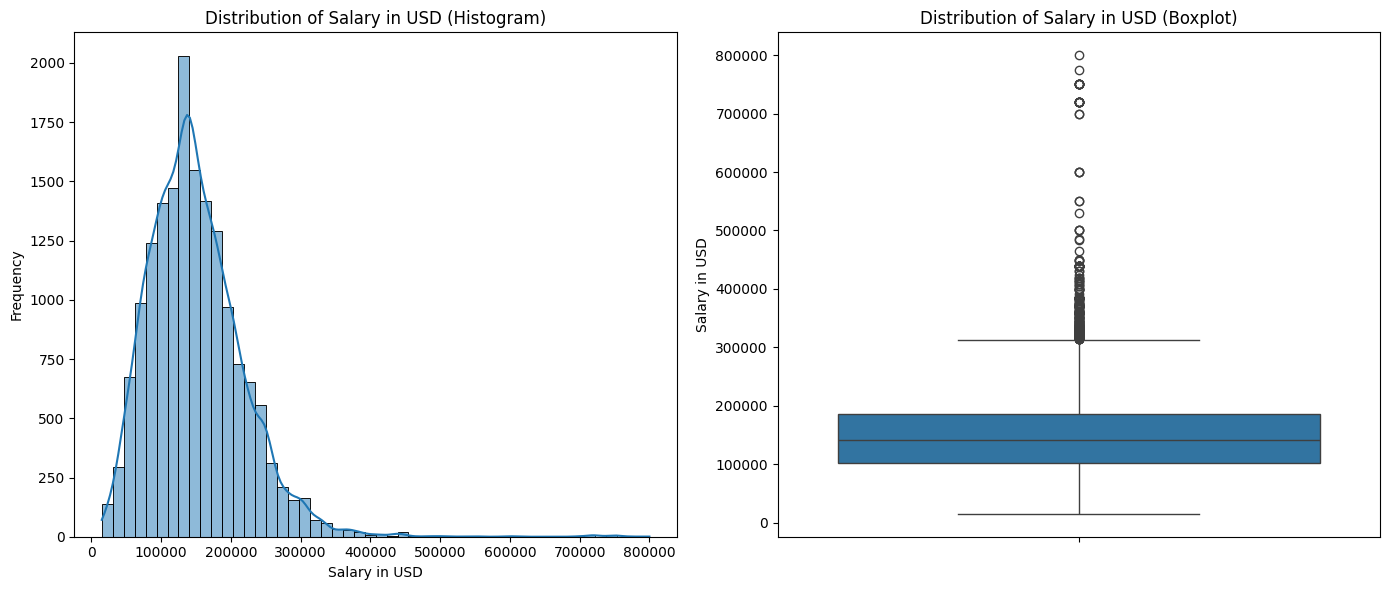

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Histogram for salary_in_usd
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.histplot(df['salary_in_usd'], kde=True, bins=50)
plt.title('Distribution of Salary in USD (Histogram)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')

# Boxplot for salary_in_usd
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(y=df['salary_in_usd'])
plt.title('Distribution of Salary in USD (Boxplot)')
plt.ylabel('Salary in USD')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

The histogram shows that salaries in USD are heavily right-skewed, with most employees earning between roughly $80,000 and $180,000 and a clear peak around the $120,000–$150,000 range. As salaries increase, the frequency drops sharply, creating a long right tail that reflects a small number of very high earners. This pattern is reinforced by the boxplot, which displays a large cluster of outliers well above the upper whisker, with extreme values reaching up to $700,000–$800,000. These outliers are statistically unusual but realistic in the tech industry, where senior or specialised AI roles can command extremely high pay. The median salary appears stable and aligns with the histogram’s peak, while the spread confirms substantial variation across the dataset. Overall, these visuals show that salaries are not evenly distributed and that the dataset contains many high-salary outliers, justifying the use of salary_in_usd for analysis and highlighting the need for careful handling of skewness and outliers in later modelling. I tought of removing these outliers, but they represent realistic high-earning roles, so it’s better to keep them and handle their impact through transformations rather than deleting valid data.

2️⃣ Work Year Trend
Countplot → work_year
✔ Proves data is from 2023–2024
✔ Shows recency

3️⃣ Experience Level Distribution
Countplot → experience_level
✔ Proves dataset is mostly mid–senior
✔ Very quick to produce

4️⃣ Remote Work Split
Countplot → remote_ratio
✔ Proves onsite vs remote polarisation
✔ Shows hybrid roles are rare

5️⃣ Company Size Distribution
Countplot → company_size
✔ Proves medium-sized companies dominate
✔ Simple, quick graph

6️⃣ Job Market Focus
Bar chart → top 10 job titles
✔ Shows the dataset is dominated by DE, DS, DA, MLE
✔ Supports later analysis

7️⃣ Geographic Imbalance
Bar chart → top 10 employee_residence
✔ Proves dataset is US-heavy
✔ Very important for interpretation

8️⃣ Raw Salary vs USD
Side-by-side boxplots → salary vs salary_in_usd
✔ Shows USD salary is cleaner, less distorted
✔ Justifies using salary_in_usd in modelling

1️⃣ The salary distribution is strongly right-skewed
The histogram shows that most salaries cluster between $80k and $180k, with the peak around $120k–$150k. As salaries increase beyond this point, the frequency drops sharply. This creates a long right tail, meaning a small number of people earn significantly more than the rest.
👉 This confirms a classic right-skewed distribution, which is typical in real-world income data.

2️⃣ There are many high-salary outliers
The boxplot clearly shows a large number of outliers far above the upper whisker, with some salaries reaching $700k–$800k. These high earners are statistically unusual but valid cases.
👉 The large number of outliers indicates salary variation is huge in this dataset, likely due to:
senior/executive roles
high-salary job titles (ML, AI Engineering)
geographic differences (e.g., US vs. other countries)

3️⃣ The median salary appears reasonable
The thick line inside the box shows a median around $140k, which is consistent with the histogram's peak.
👉 This means most employees earn within a “normal” range, but the mean is likely higher than the median because of high outliers.

4️⃣ The histogram and boxplot together justify using salary_in_usd
Your raw salary column had values up to $30 million, which were currency distortions. Here, after conversion:
The distribution is still skewed
But the extreme distortions are gone
The max salary is now around $800k, which is realistic
👉 This proves that salary_in_usd is the correct column to use for modelling.